# Stack Overflow Data (2011-2018)

## CRISP-DM

<img src="images/crisp-dm-wikipedia.png" width="300" height="300" >


### Business Understanding

Deriving understanding can be data driven or objective driven, i.e. we have access to data and forumate questions based on what is available, or we pose questions and gather data that will be useful in solving the questions. 

<img src="images/data-question-solution.png" width="500" >

In this project, our questions are motivated by the available data as we have access to a wealth of information provided by StackOverflow pertaining to responses regarding developer experience from their most comprehensive survey of software developers, available [here](https://insights.stackoverflow.com/survey). The questions posed in these surveys capture information from career satisfaction and job search to education and sound preference when coding.

The questions derived from the data are the following:

1. What are the formal education levels of people in tech?
2. What are the salary distributions of each formal education level?
3. What are the job satisfaction distributions of each formal education level?
4. What are the most popular language trends for the past 6 years?
5. What are the most popular job roles and their salaries?


### Data Understanding

As mentioned, the data has been made publically available by StackOverlow and therefore has been downloaded and stored in the ``datasets`` repository. The data gathered by StackOverflow is over a period of 6 years, specifically from 2013 to 2018. It would be expected that, for a variety of reasons, the questions posed in these surveys and the format of the answers, have changed over time. 

The format of questions and how the data is stored has varied over the years. The earlier datasets are quite cumbersome in how the questions and responses are stored, but the later years, 2017 & 2018, consist of a more robust standard and include an accompanying data dictionary. Some changes are only minor, i.e. years 2013 & 2014, such as including more topical questions to guage online interaction with the StackOverflow platform, whereas others are more dramatic, i.e. 2016, which changes the entire layout of how the data is captured.

| Format |  2011  |  2012  |  2013  |   2014  |  2015  |   2016  |   2017  |   2018  |
|------|------|------|------|------|------|------|------|------|
|1|Y|Y|-|-|-|-|-|-|
|2|-|-|Y|-|-|-|-|-|
|3|-|-|-|Y|-|-|-|-|
|4|-|-|-|-|Y|-|-|-|
|5|-|-|-|-|-|Y|-|-|
|6|-|-|-|-|-|-|Y|Y|

We will use Stack Overflow 2018 dataset for questions 1,2,3 and 5 and use 2013-2018 datasets for question 3.


### Prepare Data

This is commonly denoted as 80% of the process and the steps are documented in the notebook below, which includes loading the data into DataFrame objects, handling missing data, computing statistics and engineering new features and creating plotting functions to explain our business questions. The multiple formats add considerable complexity during the data science process in the data wrangling phase as we need to ensure attributes are consistent, same format and on the same scale.

### Model Data

In this project, we do not implement any predictive models but we opt for exploratory data analysis techniques and trend analysis over multiple datasets to assist in explaining our business questions.

### Results

Results are the findings from our wrangling and modeling and discussed in the blog post. As a result of our wrangling procedures, it enabled us to utilise matplotlib and seaborn to produce graphs to demonstrate our findings.


## Load Datasets and Schemas

Firstly, we import the necessary packages and libraries. 
1. NumPy - the fundamental package for scientific computing with Python. 
2. Pandas - a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
3. Matplotlib - a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
4. Seaborn - a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
5. glob - a module that finds all the pathnames matching a specified pattern according to the rules.

We get the paths of all survey data between 2013-2018 into an array by finding files ending in ``_public.csv``. We will also get the paths of the schemas, by finding files ending in ``_schema.csv``. This can easily be achieved with ``glob``.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from IPython import display
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [7]:
datasets = glob.glob("datasets/*_public.csv")
datasets

['datasets\\2013_survey_results_public.csv',
 'datasets\\2014_survey_results_public.csv',
 'datasets\\2015_survey_results_public.csv',
 'datasets\\2016_survey_results_public.csv',
 'datasets\\2017_survey_results_public.csv',
 'datasets\\2018_survey_results_public.csv']

In [8]:
schemas = glob.glob("datasets/*_schema.csv")
schemas

['datasets\\2017_survey_results_schema.csv',
 'datasets\\2018_survey_results_schema.csv']

# Question 1: Formal Education Level in Tech

The questions posed in this project are based around giving aspiring developers, students and people making career moves the information necessary to understand formal education related to potential salary and satisfaction to determine how far the should need/want to pursue formal education.

Therefore, our first question pertains to the formal education levels of Stack Overflow users in 2018 and therefore will load the 2018 dataset and relevant schema. 

In [9]:
df_2018 = pd.read_csv(datasets[5], index_col=None, header=0, encoding="utf-8", low_memory=False)
df_2018_schema = pd.read_csv(schemas[1], index_col=None, header=0, encoding="utf-8", names=['Column', 'Question'])

In [10]:
df_2018.head(2)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [11]:
df_2018_schema.head(2)

,Column,Question
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?


I created a few functions with the aim of removing redudant code in the following questions. 
- Firstly, ``check_missing`` determines how much missing data exists in a column.
- Secondly, ``remove_rows`` removes rows with a certain value or nulls.
- Thirdly, ``get_description`` returns the question text from the schema.
- Fourthly, ``column_analysis`` returns a DataFrame with columns regarding counts and percentage of the overall data. 
- Lastly, ``plot_bar`` plots a bar chart of the specified data.

In [12]:
def check_missing(column_name, dataset):
    '''
    INPUT - dataset - pandas dataframe with the dataset of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            missing - string - the percentage of the column which data is missing.
    '''
    missing = dataset[column_name].isnull().mean()
    
    return missing

In [13]:
def remove_rows(dataset, col, vals=[], values=False, nulls=True):
    '''
    INPUT - dataset - pandas dataframe with the dataset of the developers survey
            col - string - the name of the column you would like to select
            vals - list of strings - the names of the values you would like to remove
            values - boolean - true to remove values.
            nulls - boolean - remove nulls for a specified column
    OUTPUT - 
            A subset of the original data with the specified values or nulls removed
    ''' 
    if values:
        if len(vals) >= 1:
            for val in vals:
                dataset = dataset[dataset[col] != val]
    
    if nulls:
        dataset = dataset.dropna(how='any', subset = [col], axis=0)
        
    return dataset

In [14]:
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [15]:
def column_analysis(column_name, dataset):
    '''
    INPUT - dataset - pandas dataframe with the dataset of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            info - string - the counts and percentages of formal educations
    '''
    info = pd.DataFrame(dataset[column_name].value_counts()).reset_index()
    info.columns = [column_name, 'Count']
    info['Percent'] = info['Count']/np.sum(info['Count'])
    
    return info

In [16]:
def plot_bar(dataset, x, y, show_outliers=True):
    '''
    INPUT - dataset - pandas dataframe with the dataset of the developers survey
            x - string - the name of the column you would like to group by
            y - string - the name of the column you would like to visualise
    OUTPUT - 
            A box plot of the user specified data
    '''
    # Create box plot with Seaborn's default settings
    ax = dataset.plot.barh(x=x, y=y, legend=None)
    ax.set_xlabel(y)
    ax.set_ylabel("")
    ax.invert_yaxis()

We are interested primarily in the ``FormalEducation`` column in the 2018 dataset, ``df_2018``. Therefore, we can groupby the ``FormalEducation`` column and obtain high level statistics regarding ``ConvertedSalary``.

In [17]:
df_2018.groupby('FormalEducation')['ConvertedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
FormalEducation,,,,,,,,
Associate degree,1513.0,99178.012558,223994.972587,0.0,27000.0,54755.0,86963.0,2000000.0
"Bachelor’s degree (BA, BS, B.Eng., etc.)",22824.0,96462.508500,206249.270906,0.0,23028.0,58746.0,95968.0,2000000.0
I never completed any formal education,177.0,151409.604520,346192.139381,0.0,9540.0,48000.0,100000.0,2000000.0
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",11179.0,100588.150282,191524.795442,0.0,33048.0,59880.0,96318.0,2000000.0
"Other doctoral degree (Ph.D, Ed.D., etc.)",1191.0,127154.871537,207058.036346,0.0,53851.0,79552.0,121270.5,2000000.0
Primary/elementary school,388.0,71942.713918,220788.592603,0.0,120.0,12012.0,58441.5,2000000.0
"Professional degree (JD, MD, etc.)",612.0,81716.982026,205184.971453,0.0,18000.0,31848.0,61194.0,2000000.0
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",3021.0,69065.995366,173331.986143,0.0,8952.0,29376.0,62412.0,2000000.0
Some college/university study without earning a degree,6103.0,92913.785188,201987.896484,0.0,22500.0,50000.0,90000.0,2000000.0


As we are interested in the ``ConvertedSalary``, it would be useful to know how much data is missing to determine if the analysis is worthwhile and if so, remove rows which do not contain a value. 

In [18]:
check_missing('ConvertedSalary', df_2018)

0.5174548581255374

In [19]:
df_2018_no_null = remove_rows(df_2018, 'ConvertedSalary')

In [20]:
check_missing('ConvertedSalary', df_2018_no_null)

0.0

Fortunately the ``FormalEducation`` column does not require any string splitting as the respondents could only select one value, which can be shown in the groupby function above, or the cell below. Therefore getting the value counts requires little in the way of preprocessing. Although, a feature has been engineered to determine the percentage of ``FormalEducation`` over the entire dataset.

In [21]:
df_2018_no_null['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Associate degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [22]:
df_2018_education = column_analysis('FormalEducation', df_2018_no_null)
df_2018_education

,FormalEducation,Count,Percent
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",22824,0.485534
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",11179,0.237811
2,Some college/university study without earning ...,6103,0.129829
3,"Secondary school (e.g. American high school, G...",3021,0.064266
4,Associate degree,1513,0.032186
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",1191,0.025336
6,"Professional degree (JD, MD, etc.)",612,0.013019
7,Primary/elementary school,388,0.008254
8,I never completed any formal education,177,0.003765


Given the resulting DataFrame, we can see the most common formal education responses along with their percentage statistic of the user base. As tables are not that interesting to more general audiences, we will use the ``plot_bar`` function defined above.

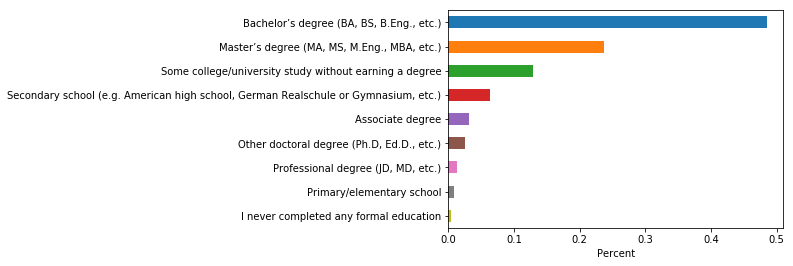

In [23]:
plot_bar(df_2018_education, 'FormalEducation', 'Percent')

## Question 2: Formal Education Level in Tech

Building on this, we want to look at the salary distribution for each group of Formal Education, to determine if its true that a higher degree will increase your likelihood of earning a higher salary. The 2018 dataset contains a few columns regarding salary, although the one we are most interested in is ``ConvertedSalary`` also used above.

In [24]:
get_description('ConvertedSalary', df_2018_schema)

'Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks.'

In Exploratory Data Analysis (EDA), as we are looking at one feature, the most appropriate visualisation would be the histogram. This allows us to study the distribution of the responses. Therefore, similarly to our other functions, the below function enables us to plot the histograms of a given column in a dataframe without repeating code. 

As different categories in a dataset can be of many sizes, the bin size should be changed as such to ensure they are not too large or small. We have chosen the square root of the size of the data as a general rule of thumb.

In [25]:
def plot_hist_column(dataset, x, y):
    '''
    INPUT - dataset - pandas dataframe with the dataset of the developers survey
            x - string - the name of the column you would like to group by
            y - string - the name of the column you would like to visualise
    OUTPUT - 
            A histogram of the user specified data
    '''
    for val in dataset[pd.notnull(dataset[x])][x].unique():
        subset = dataset[dataset[x] == val]
        subset = subset[pd.notnull(subset[y])]
        n_bins = np.sqrt(len(subset))
        plt.hist(subset[y], bins = int(n_bins))
        plt.title("{}..".format(val[:40]))
        plt.show()

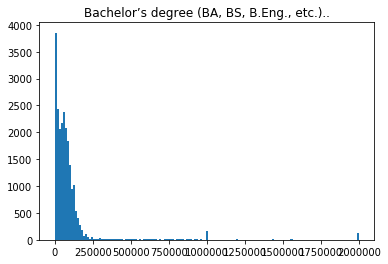

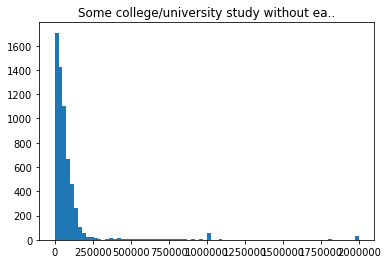

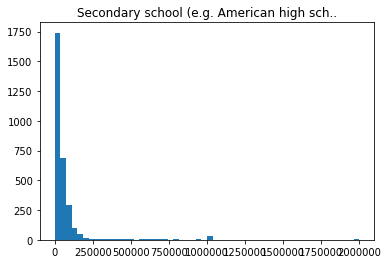

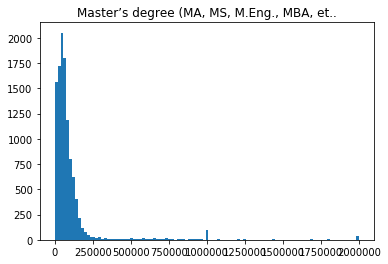

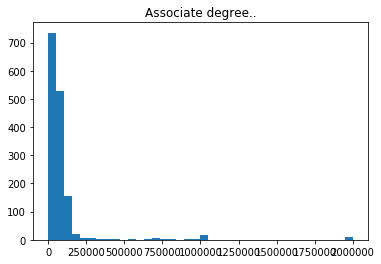

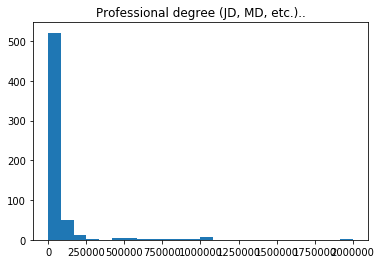

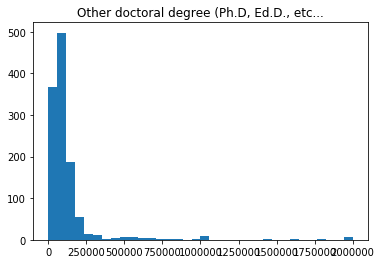

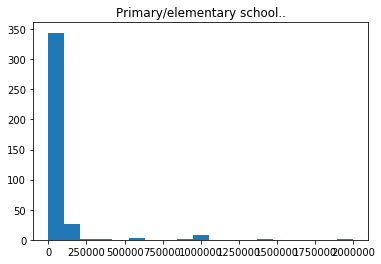

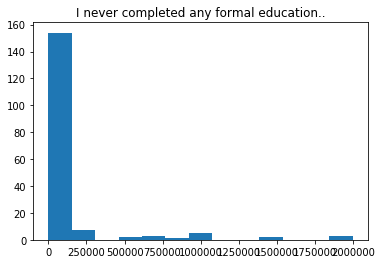

In [26]:
plot_hist_column(df_2018_no_null, 'FormalEducation', 'ConvertedSalary')

It is no surprise that the distribution of all education levels follows a similar pattern. The scale of the data is between \$0-\$2,000,000 and no doubt most individuals fall into the left most bins, closer to 0, resulting in right skewed distributions in all cases.


Remove rows with nan values in the ``Employment`` and ``Student`` columns, this is to ensure we are considering salaries of those who are either students or employed. Additionally, I have also removed students who are in full-time education.
Additionally, we have removed the entries in ``ConvertedSalary`` which contain 0 and therefore indicating unemployment.

In [27]:
df_2018_no_null['Student'].unique()

array(['No', 'Yes, part-time', 'Yes, full-time', nan], dtype=object)

In [28]:
df_2018_subset = remove_rows(df_2018_no_null, 'Student', ['Yes, full-time'], True, True)
df_2018_subset['Student'].unique()

array(['No', 'Yes, part-time'], dtype=object)

In [29]:
df_2018_subset['Employment'].unique()

array(['Employed full-time', 'Employed part-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Not employed, and not looking for work', nan, 'Retired'],
      dtype=object)

In [30]:
df_2018_subset = remove_rows(df_2018_subset, 'Employment', ['Not employed, and not looking for work', 'Not employed, but looking for work', 'Retired'], True, True)
df_2018_subset['Employment'].unique()

array(['Employed full-time', 'Employed part-time',
       'Independent contractor, freelancer, or self-employed'],
      dtype=object)

In [31]:
df_2018_subset.shape

(40541, 129)

In [32]:
df_2018_subset = df_2018_subset[df_2018_subset['ConvertedSalary'] > 0]

In [33]:
df_2018_subset.shape

(40400, 129)

We want to represent the distributions of various groups on the same graph, which will allow for easier comparison between groups. Swarm plots are a good idea when we have a smaller set of data, but something more appropriate for our data would be box and whisker plots. 

The function below defines such a graph which will be reused throughout this and subsequent questions. We use the seaborn package for generating these graphs as they are flexible and easily customisable.